In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.utils import np_utils
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
df=pd.read_csv('Cleaned_Data.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,communal violence bhainsa telangana stone pelt...,1
1,1,ablaze,NaN,telangana section imposed bhainsa january clas...,1
2,2,ablaze,USA,arsonist set car ablaze dealership,1
3,3,ablaze,"Morgantown, WV",arsonist set car ablaze dealership,1
4,4,ablaze,NaN,lord jesus love brings freedom pardon fill hol...,0


In [4]:
df.isna().sum()

id             0
keyword        0
location    3418
text           3
target         0
dtype: int64

In [5]:
df.dropna(subset = ['text'],inplace=True)

In [6]:
df.isna().sum()

id             0
keyword        0
location    3417
text           0
target         0
dtype: int64

In [9]:
y = df['target']
y = np.array(y)


In [11]:
x = df.text.values

In [12]:
x

array(['communal violence bhainsa telangana stone pelted muslim house house vehicle set ablaze…',
       'telangana section imposed bhainsa january clash erupted two group january po…',
       'arsonist set car ablaze dealership', ...,
       'feel directly attacked :skull: consider moonbin amp jinjin bias im currently wrecked rocky hate',
       'ok remember outcast nd dora au au wrecked nerve nd braincells jdkshssjhs legend',
       'jake corway wrecked running irp'], dtype=object)

In [14]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)


In [15]:
len(tokenizer.word_index)

22241

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(x)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [17]:
encoded_docs[0]

[3873, 755, 1549, 1633, 1114, 3874, 387, 80, 80, 503, 178]

In [18]:
padded_sequence[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [19]:
padded_sequence.shape

(11367, 200)

In [37]:
#Building LSTM MODEL
embedding_vector_length = 32
lstm = Sequential()
lstm.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
lstm.add(SpatialDropout1D(0.25))
lstm.add(LSTM(50,return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(120,return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(40))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [38]:
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 32)           711744    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 200, 50)           16600     
_________________________________________________________________
dropout_8 (Dropout)          (None, 200, 50)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 200, 120)          82080     
_________________________________________________________________
dropout_9 (Dropout)          (None, 200, 120)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 40)               

In [39]:
history_lstm = lstm.fit(padded_sequence,y,
                  validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
285/285 [==============================] - 15s 37ms/step - loss: 0.4665 - accuracy: 0.8256 - val_loss: 0.4156 - val_accuracy: 0.8478
Epoch 2/10
285/285 [==============================] - 9s 31ms/step - loss: 0.2188 - accuracy: 0.9199 - val_loss: 0.4461 - val_accuracy: 0.8478
Epoch 3/10
285/285 [==============================] - 9s 32ms/step - loss: 0.1589 - accuracy: 0.9442 - val_loss: 0.4808 - val_accuracy: 0.8430
Epoch 4/10
285/285 [==============================] - 9s 32ms/step - loss: 0.1131 - accuracy: 0.9610 - val_loss: 0.5478 - val_accuracy: 0.8316
Epoch 5/10
285/285 [==============================] - 9s 31ms/step - loss: 0.0818 - accuracy: 0.9738 - val_loss: 0.6287 - val_accuracy: 0.8298
Epoch 6/10
285/285 [==============================] - 9s 31ms/step - loss: 0.0606 - accuracy: 0.9830 - val_loss: 0.7081 - val_accuracy: 0.8263
Epoch 7/10
285/285 [==============================] - 9s 31ms/step - loss: 0.0554 - accuracy: 0.9818 - val_loss: 0.7995 - val_accuracy: 0.821

In [40]:
#Building GRU MODEL
embedding_vector_length = 32
gru = Sequential()
gru.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
gru.add(SpatialDropout1D(0.25))
gru.add(GRU(50,return_sequences=True))
gru.add(Dropout(0.2))
gru.add(GRU(120,return_sequences=True))
gru.add(Dropout(0.3))
gru.add(GRU(40))
gru.add(Dense(1, activation='sigmoid'))
gru.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [41]:
gru.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 32)           711744    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 200, 32)           0         
_________________________________________________________________
gru_6 (GRU)                  (None, 200, 50)           12600     
_________________________________________________________________
dropout_10 (Dropout)         (None, 200, 50)           0         
_________________________________________________________________
gru_7 (GRU)                  (None, 200, 120)          61920     
_________________________________________________________________
dropout_11 (Dropout)         (None, 200, 120)          0         
_________________________________________________________________
gru_8 (GRU)                  (None, 40)               

In [42]:
history_gru = gru.fit(padded_sequence,y,
                  validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
285/285 [==============================] - 13s 33ms/step - loss: 0.4400 - accuracy: 0.8313 - val_loss: 0.4097 - val_accuracy: 0.8320
Epoch 2/10
285/285 [==============================] - 8s 30ms/step - loss: 0.1976 - accuracy: 0.9313 - val_loss: 0.4165 - val_accuracy: 0.8404
Epoch 3/10
285/285 [==============================] - 8s 29ms/step - loss: 0.1365 - accuracy: 0.9536 - val_loss: 0.5036 - val_accuracy: 0.8399
Epoch 4/10
285/285 [==============================] - 8s 29ms/step - loss: 0.1018 - accuracy: 0.9651 - val_loss: 0.5896 - val_accuracy: 0.8347
Epoch 5/10
285/285 [==============================] - 9s 30ms/step - loss: 0.0751 - accuracy: 0.9753 - val_loss: 0.6460 - val_accuracy: 0.8338
Epoch 6/10
285/285 [==============================] - 9s 30ms/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 0.7460 - val_accuracy: 0.8267
Epoch 7/10
285/285 [==============================] - 8s 29ms/step - loss: 0.0478 - accuracy: 0.9830 - val_loss: 0.8251 - val_accuracy: 0.826

In [43]:
LSTM_history = pd.DataFrame(history_lstm.history) 
GRU_history= pd.DataFrame(history_gru.history)

LSTM_history.to_csv('LSTM.csv')
GRU_history.to_csv('GRU.csv')

In [44]:
LSTM_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.396741,0.848015,0.415562,0.847845
1,0.217522,0.922578,0.446052,0.847845
2,0.158872,0.943143,0.480822,0.843008
3,0.118031,0.959309,0.547794,0.831574
4,0.090583,0.968657,0.628743,0.829815


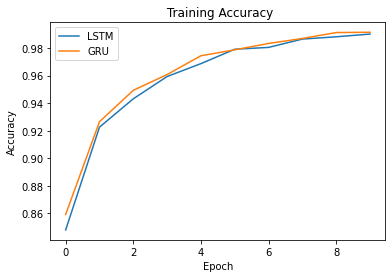

In [46]:
#Training Accuracy
plt.plot(LSTM_history['accuracy'])
plt.plot(GRU_history['accuracy'])
plt.title(' Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='best')
plt.show()

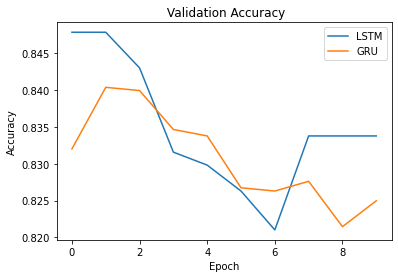

In [47]:
#Validation Accuracy
plt.plot(LSTM_history['val_accuracy'])
plt.plot(GRU_history['val_accuracy'])
plt.title(' Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='best')
plt.show()

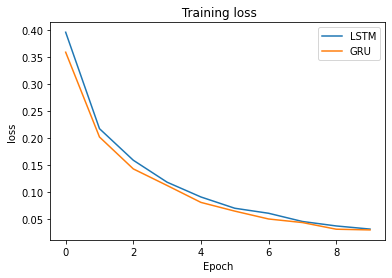

In [48]:
#Training loss
plt.plot(LSTM_history['loss'])
plt.plot(GRU_history['loss'])
plt.title(' Training loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='best')
plt.show()

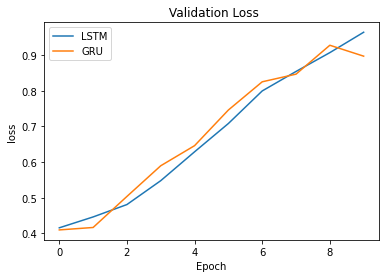

In [49]:
#Validation Loss
plt.plot(LSTM_history['val_loss'])
plt.plot(GRU_history['val_loss'])
plt.title(' Validation Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['LSTM', 'GRU'], loc='best')
plt.show()